## Checkpoint 6

### Aim

To write a Python program to calculate the volume of molecules made up of overlapping spherical atoms; it is also an example in using OOP to simpify the task. Don't get frightened, for this checkpoint you will be given part of the code to help you progress (***this also simulates pretty well how multi-person software development works***).

## Monte Carlo estimate of π

Consider a circle of radius r within a square of side $2r \times 2r$ as shown in the figure below.

![dynamicpng-width_300.png](dynamicpng-width_300.png)

### Calculation of π by estimation of area.

If we randomly pick N points evenly distributed within the square and $N_{i}$ of them are inside the circle, then an estimate of the area of the circle A is given by the fraction falling inside the circle multiplied by the area of the square, so

$$ A=4r^ 2 \frac{N_i}{N} $$

Noting that $A=\pi r^2$, we get an estimate for the value of π given by,

$$ π≈4 \frac{N_i}{N} $$

So provided the selection of points is evenly distributed over the whole square, than as N becomes large you will get a good estimate for $\pi$. This is the basis of Monte Carlo integration and can be used to estimate the internal area of any closed object.

See an example Python code that uses the random.uniform() function to form random points:

- Code example to calculate $\pi$ [here](../CodeExamples/PiExample.ipynb)

Take a look at this and experiment, you will find that for N>200,000 you get a reasonable estimate for $\pi$, and that as N gets larger the estimate gets better.

This is clearly a "very bad" way to calcuate π, but is very useful for finding the area of overlapping objects in two-dimensions as shown in the figure below; which is otherwise analytically tricky.
![dynamicpng-width_250.png](dynamicpng-width_250.png)

This can also easily be extended to three-dimensions so for example overlapping spheres as shown below.
![dynamicpng-width_2502.png](dynamicpng-width_2502.png)

Here the method is to form a bounding box of dimensions Vb=a×b×c that totally encloses the object. If N points are in the bounding box and N$_i$ are inside the object, then the volume of the object is simply given by

$$ V_0=V_b \frac{N_i}{N} $$

This technique is used in computer simulations of molecules to calculate the volume of molecules that are made up of overlapping spherical atoms. 


#### Code Structure

This is rather tricky program but it can be vastly simplied by use of OOP; the suggested structure is

1. Form an Atom class by extending the Vector3d class given by Vector3d Class
2. The Atom class should add an extra internal variable radius and have a boolean method isInside(v) which takes argument v being a Vector3d and returns True if v is inside the atom. (Note the distance(v) method of Vector3d is useful here.)
3. Form a Molecule class that has a list of objects of type Atom and a boolean method isInside(v), which takes argument v being a Vector3d and returns True if v is inside the molecule.

- You also need to consider how to read in the location of the atoms; this is similar to Checkpoint 4.

4. Form a BoundingBox class where the constructor takes a populated Molecule and finds and stores internally the minima / maxima of the box round the molecule (you need 6 floats). This class should have two methods:
- volume() that gets the volume of the box.
- getRandomPoint() which should return a random Vector3d that is randomly distributed inside the box.

    (This is the most “messy” bit of the code to write.)

If you have this structure, then what your main program has to do is:

- Ask for the file containing the Atom data and read this into a Molecule.
- Construct a BoundingBox from the Molecule
- Go round a while loop,
- Getting a random Vector3d from the BoundingBox
- Testing if it isInside() the Molecule and incrementing a counter if it is.
- Finally calculating the estimate for the Molecule volume and printing it out.

It is also useful to monitor the progress of the estimate as was done in the example code for estimation of π to check how the integration is going.

#### Format of Data

There are two data files suppied (in the current directory, so they can be read in and executed directly upon here), these being :

- [oxygen.data](oxygen.data) : single oxygen atom
- [water.data](water.data) : water molecule

each consists of a comma delimited CSV file with one atom per line in the format,

Name , r , x , y , z

with comment lines delimited by # being the same format as coded in [Parsing Input](../CourseNotes/ParsingInput.ipynb) and used in [Checkpoint 4](Checkpoint4.ipynb).

#### Computing Task

Write a Python program based on the above structure to:

1. Read in the data file defining the atom locations.
2. Prompt the user for the number of points to run in the calculation.
3. Calculate the volume of the molecule using Monte Carlo integration and output the final value.
4. Optionally plot a graph of the convergence of the algorithm, being the estimate against number of points. The graph should have 100 data points at regular intervals, see Pi example for how to to this easily.
5. Test your code with a single oxygen atom and with water. ***For a pass, only the atom is strictly necessary to run.***
> #### Note
> The volume of a single oxygen atom of radius 1.4 Å is 11.494 Å$^3$. The volume of water is $\approx$ 15.5 Å$^3$. Use these values to check your results before calling a demonstrator.
6. Have another careful read of [final weekly task](../WeeklyTasks/Week6.ipynb).



In [1]:
""""
    A more developed Vector class for simple 3d vectors
"""

import math
import random
import csv
import matplotlib.pyplot as plt
class Vector3d(object):
    """
    Simple vector 3d class
    """
    def __init__(self, x, y, z):
        """
        Constructor to form a vector
        """
        self.x = float(x)
        self.y = float(y)
        self.z = float(z)

    def __str__(self): 
        """
        Method to format a vector as a string (implments str()) 
        """
        return "[" + str(self.x) + ", " + str(self.y) + ", " + str(self.z) + "]"

    def copy(self):
        """
        Method to return a copy of current vector
        """
        return Vector3d(self.x,self.y,self.z)

    def magnitude(self):
        """
        Return the magnitude
        """
        return math.sqrt(self.x*self.x + self.y*self.y + self.z*self.z)

    def distance(self,b):
        """
        Distance from self to vector b
        """
        dx = self.x - b.x
        dy = self.y - b.y
        dz = self.z - b.z
        return math.sqrt(dx*dx + dy*dy + dz*dz)


    def normalise(self):
        """
        Normalise current vector so its magnitude is 1.0 (unit vector)
        """
        mag = self.magnitude()
        if mag != 0.0 :         # if not already zero
            self.x /= mag       # dveive throgh by mag
            self.y /= mag
            self.z /= mag

    def add(self,b):
        """
        Add a vector b to self and return a new vector.
        """
        x = self.x + b.x
        y = self.y + b.y
        z = self.z + b.z
        return Vector3d(x,y,z)

    def addTo(self,b):
        """
        Add a vector b to self in place.
        """
        self.x += b.x
        self.y += b.y
        self.z += b.z


    def dot(self,b):
        """
        Form dot product between self and vector b
        """
        return self.x*b.x + self.y*b.y + self.z*b.z

    def cross(self,b):
        """
        Form cross product between self and vector b.
        """
        x = self.y*b.z - self.z*b.y
        y = self.z*b.x - self.x*b.z
        z = self.x*b.y - self.y*b.x
        return Vector3d(x,y,z)

def main():               
    """
    Simple test program to test the vectors
    """
    a = Vector3d(1,2,3)
    b = Vector3d(4,5,6)

    print("Magnitude of a is " + str(a.magnitude()))

    c = a.cross(b)           # Form cross product
    #
    #         the str() function call the __str__(self) method
    print("Cross product of a x b is : " + str(c)) 



#main()

In [2]:
class Atom(Vector3d):
    """
    The Atom class to extends the Vector3d that hold position
    """

    def __init__(self, x, y, z, r):
        """
        Constructor to form an atom with x, y, z, r parameters
        """
        super().__init__(x, y, z)
        self.radius = r  # Radius of the atom

    def __str__(self):
        """
        Implements str()
        """
        return f"Atom at [{self.x}, {self.y}, {self.z}] with radius {self.radius}"

    def isInside(self, v):
        """
        isInside method, returns True if v is inside atom
        """
        # Check if the distance from the atom to vector v is less than or equal to the radius
        return self.distance(v) <= self.radius

In [3]:
### Molecule class

class Molecule(list):
    """
    Molecule, being a list to hold Atoms
    """
    def __init__(self, *args):
        """
        Constructor to form a Molecule with optional arguments each one assumed to be an Atom
        """
        list.__init__(self)  # Init underlying list
        for a in args:  # Append any args to list
            self.append(a)

    def __str__(self):
        """Format string of all atoms"""
        s = ""
        for a in self:
            s += str(a) + "\n"
        return s

    def isInside(self, v):
        """
        Method to check if vector is inside molecule.
        """
        # Check if vector v is inside any of the atoms in the molecule
        for atom in self:
            if atom.isInside(v):
                return True
        return False  # if here then v is outside the molecule

    def fromFile(self, file):
        """
        Read Atoms from a file
        """
        reader = csv.reader(file)
        for line in reader:
            if line[0].startswith('#'):
                continue  # Skip comment lines
            name, r, x, y, z = line
            atom = Atom(float(x), float(y), float(z), float(r))
            self.append(atom)  # Add atom to the molecule
        return self
       

In [4]:
### BoundingBox class

class BoundingBox(object):
    """
    Class to define a  bounding box class round the molecule
    """
    def __init__(self, molecule):
        """
        The Constructor, which takes a molecule
        """
        self.xmin = float("inf")             # Initially set limits to +/- infty
        self.ymin = float("inf")
        self.zmin = float("inf")
        self.xmax = float("-inf")
        self.ymax = float("-inf")
        self.zmax = float("-inf")

        for atom in molecule:
            self.xmin = min(self.xmin, atom.x - atom.radius)
            self.ymin = min(self.ymin, atom.y - atom.radius)
            self.zmin = min(self.zmin, atom.z - atom.radius)
            self.xmax = max(self.xmax, atom.x + atom.radius)
            self.ymax = max(self.ymax, atom.y + atom.radius)
            self.zmax = max(self.zmax, atom.z + atom.radius)

    def volume(self):
        """
        Get the volume of the box
        """
        # Your code here
        return (self.xmax - self.xmin) * (self.ymax - self.ymin) * (self.zmax - self.zmin)    

    def getRandomPoint(self):
        """
            Get a random point in the bounding box as a Vector3d.
        """
        x = random.uniform(self.xmin, self.xmax)
        y = random.uniform(self.ymin, self.ymax)
        z = random.uniform(self.zmin, self.zmax)
        return Vector3d(x, y, z)
        # Your code here
      

Molecule is 
Atom at [10.0, 8.0, 4.0] with radius 1.4

Progress: 2000/200000.0, Current Volume Estimate: 11.590656000000006
Progress: 4000/200000.0, Current Volume Estimate: 11.634560000000008
Progress: 6000/200000.0, Current Volume Estimate: 11.660170666666673
Progress: 8000/200000.0, Current Volume Estimate: 11.590656000000006
Progress: 10000/200000.0, Current Volume Estimate: 11.581875200000006
Progress: 12000/200000.0, Current Volume Estimate: 11.54309333333334
Progress: 14000/200000.0, Current Volume Estimate: 11.476192000000006
Progress: 16000/200000.0, Current Volume Estimate: 11.478152000000007
Progress: 18000/200000.0, Current Volume Estimate: 11.524800000000006
Progress: 20000/200000.0, Current Volume Estimate: 11.531385600000005
Progress: 22000/200000.0, Current Volume Estimate: 11.525797818181825
Progress: 24000/200000.0, Current Volume Estimate: 11.573277333333339
Progress: 26000/200000.0, Current Volume Estimate: 11.544219076923083
Progress: 28000/200000.0, Current Volume

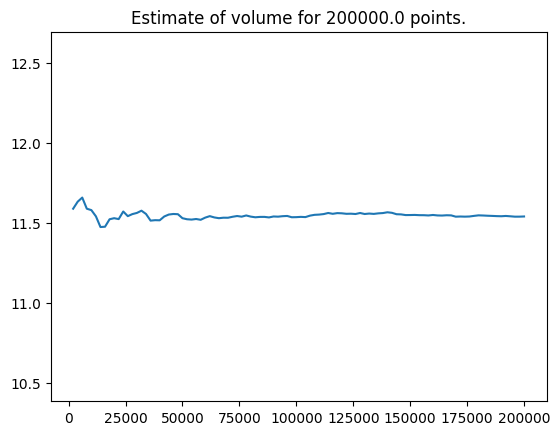

In [5]:

"""    Main program to do the simulation
"""
    
file = open(str(input("File : ")),"r")   # Open file
mol = Molecule().fromFile(file)              # Read in molecule
print("Molecule is \n" + str(mol))           # Print out info
box = BoundingBox(mol)                       # Form Bounding box

maxpoint = float(input("Number of points : ")) # Max number of points
plotInterval = maxpoint/100                    # Plot internal for monitoring

# Your code here
points_inside = 0  # Counter for points inside the molecule
xData = []  # Data for x-axis of the plot (number of points)
yData = []  # Data for y-axis of the plot (volume estimate)

p = 0
while p < maxpoint:  # Loop counting internal points
    random_point = box.getRandomPoint()  # Get a random point in the bounding box
    if mol.isInside(random_point):  # Check if the point is inside the molecule
        points_inside += 1
    if (p + 1) % plotInterval == 0:  # Update the plot data at regular intervals
        current_volume_estimate = box.volume() * (points_inside / (p + 1))
        xData.append(p + 1)
        yData.append(current_volume_estimate)
        print(f"Progress: {p + 1}/{maxpoint}, Current Volume Estimate: {current_volume_estimate}")
    p += 1

# Final volume estimate after all points have been tested
estimate = box.volume() * (points_inside / maxpoint)
print("Final estimate is : " + str(estimate))

# Plot the convergence of the volume estimate
plt.plot(xData, yData)  # Draw graph (with default plot)
plt.ylim(0.9 * estimate, 1.1 * estimate)  # Set y-axis limits to focus on estimate convergence
plt.title("Estimate of volume for " + str(maxpoint) + " points.")
plt.show()

In [6]:
import statistics

# Real volume of a single oxygen atom
real_volume = 11.494

# Calculate the mean of the estimated volumes
mean_estimate = statistics.mean(yData)

# Calculate the standard deviation of the estimated volumes
std_dev = statistics.stdev(yData)

# Print the results
print(f"Real Volume: {real_volume}")
print(f"Mean Estimated Volume: {mean_estimate}")
print(f"Standard Deviation: {std_dev}")

# Compare the mean estimate with the real volume
difference = abs(mean_estimate - real_volume)
print(f"Difference between mean estimate and real volume: {difference}")

Real Volume: 11.494
Mean Estimated Volume: 11.548090733628104
Standard Deviation: 0.02234154787593417
Difference between mean estimate and real volume: 0.05409073362810446
